EDA - Superheroes

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [166]:
#import e verificação dos dados
data = pd.read_csv('superheroes_nlp_dataset.csv')

In [167]:
data.shape

(1450, 81)

In [168]:
data.describe()

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.090383,0.076645,0.075922,0.050615,0.083876,0.082430,0.133044,0.080260,0.109906,0.089660,0.120029,0.095445,0.148952,0.046999,0.090383,0.093999,0.169197,0.112798,0.155459,0.151121,0.122921,0.143167,0.152567,0.108460,0.102675,0.156905,0.135936,0.151844,0.146059,0.136659,0.135213,0.141721,0.229935,0.224873,0.262473,0.206074,0.241504,0.253796,0.320318,0.349964,0.266811,0.308026,0.409978,0.433116,0.428778,0.386840,0.511931,0.532899,0.562545,0.528561
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.286834,0.266124,0.264969,0.219289,0.277301,0.275117,0.339745,0.271794,0.312886,0.285798,0.325113,0.293934,0.356170,0.211714,0.286834,0.291932,0.375062,0.316460,0.362473,0.358296,0.328465,0.350370,0.359700,0.311073,0.303644,0.363843,0.342845,0.358999,0.353293,0.343612,0.342075,0.348890,0.420943,0.417650,0.440137,0.404630,0.428150,0.435340,0.466768,0.477131,0.442453,0.461844,0.492007,0.495686,0.495080,0.487203,0.500038,0.499097,0.496252,0.499364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [169]:
#conferencia inicial nas colunas do dataset
pd.set_option('display.max_columns', 100)
data.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,40,70,"['Super Speed', 'Super Strength']",[],[''],NaN,NaN,Marvel Comics,Good,NaN,NaN,"['Annihilators', 'Asgardians', 'Avengers', 'Ne...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/10038.jpg?v=156096...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,35,100,"['Durability', 'Reflexes', 'Super Strength']","['Batgod', 'Batman', 'Batman (1966)', 'Batman ...","['Subject 514A', 'Bruce Wayne', 'Bruce 2']",NaN,NaN,DC Comics,NaN,NaN,NaN,[],Bruce Wayne (genetic template),NaN,NaN,-,-,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,100,80,"['Accelerated Healing', 'Agility', 'Berserk Mo...",[],['Rick Jones'],"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,Good,"Musician, adventurer, author; formerly talk sh...",NaN,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,Male,Human,6'8 • 203 cm,980 lb • 441 kg,Yellow,No Hair,NaN,/pictures2/portraits/10/050/10060.jpg?v=158233...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,100,55,"['Energy Absorption', 'Energy Armor', 'Energy ...",[],[''],Stoneworld,Green Lantern Vol 3 #21,DC Comics,Good,NaN,NaN,"['Blue Lantern Corps', 'Green Lantern Corps', ...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/1410.jpg?v=1581168103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,30,50,"['Weapon-based Powers', 'Weapons Master']",[],[''],Gotham City,NaN,DC Comics,Good,NaN,NaN,[],NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/11650.jpg?v=156173...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [170]:
#check dados missing
data.isna().sum()

name                    2
real_name             149
full_name             494
overall_score           0
history_text           90
                     ... 
has_super_speed        67
has_durability         67
has_stamina            67
has_agility            67
has_super_strength     67
Length: 81, dtype: int64

<AxesSubplot:>

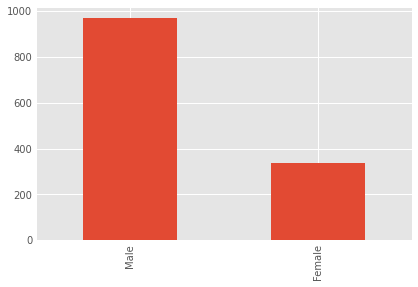

In [171]:
#proporção de homens e mulheres
data['gender'].value_counts().plot.bar()

<AxesSubplot:ylabel='type_race'>

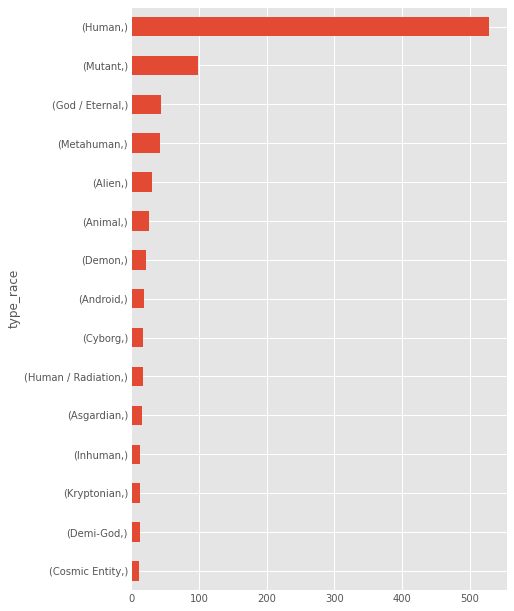

In [172]:
#Top 15 raças mais relevantes?
data.type_race.unique()

f, ax = plt.subplots(figsize = (6,10))
data[['type_race']].value_counts().head(15)[::-1].plot(kind="barh")


In [173]:
#qual os herois mais pesados e altos?

data['weight'].unique

#vou aplicar regex pra extrair o KG
#(\d+)\s*kg - uma série de números seguido de espaços e as letras 'kg' no final

data['peso'] = data['weight'].str.extract(r'(\d+)\s*kg').fillna(0).astype(int)
data['altura'] = data['height'].str.extract(r'(\d+)\s*cm').fillna(0).astype(int)
data['peso'].head()

0      0
1      0
2    441
3      0
4      0
Name: peso, dtype: int32

<AxesSubplot:ylabel='name'>

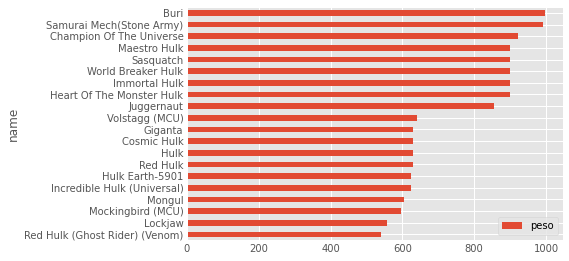

In [174]:
data[['name','peso']].sort_values(by='peso',ascending=False).head(20).set_index('name')[::-1].plot(kind='barh')

Hulk aparece bastante como um dos heróis mais pesados, talvez faça sentido agrupar em uma única nomenclatura para dar espaços para outros heróis nesse top 20

<AxesSubplot:ylabel='name'>

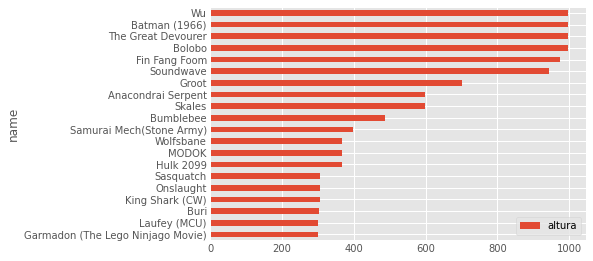

In [175]:
data[['name','altura']].sort_values(by='altura',ascending=False).head(20).set_index('name')[::-1].plot(kind='barh')

In [176]:
#batman 1966? LOL
data[data['name']=='Batman (1966)'][['height','altura']]

,height,altura
130,32'9 • 998 cm,998


Aqui o batman aparece provavelmente erroneamente. Aqui faria sentido substituir esse peso pela média de outros personagens com peso parecido. Isso caso haja correlação entre peso e altura, até pra corrijir outros casos errados, vamos checar:

<AxesSubplot:xlabel='altura', ylabel='peso'>

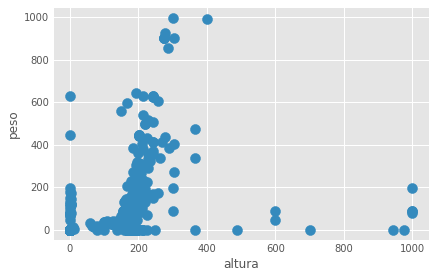

In [188]:
data.plot.scatter(x = 'altura', y = 'peso', s = 100)

<AxesSubplot:xlabel='altura', ylabel='peso'>

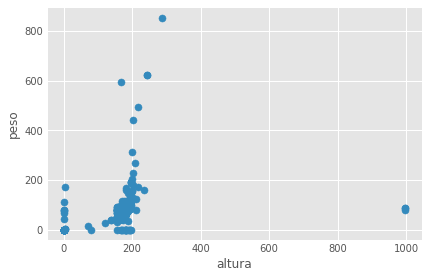

In [194]:
data[data['type_race']=='Human'].plot.scatter(x = 'altura', y = 'peso', s = 50)

A altura não parece fortemente correlacionada com o peso, há personagens com alturas próximas e pesos variados, vale o check com pearson

In [191]:
corr = data['altura'].corr(data['peso'])
corr

0.42362227651217804

Check das correlações gerais entre todas as variáveis de poder

In [177]:
#matriz de correlação entre as variaveis numéricas, pra finalidade desse estudo vou simplesmente substituir os nulos por 0.

colunas_poderes = [col for col in data if col.startswith('has_')]
data[colunas_poderes] = data[colunas_poderes].fillna(0)

<AxesSubplot:>

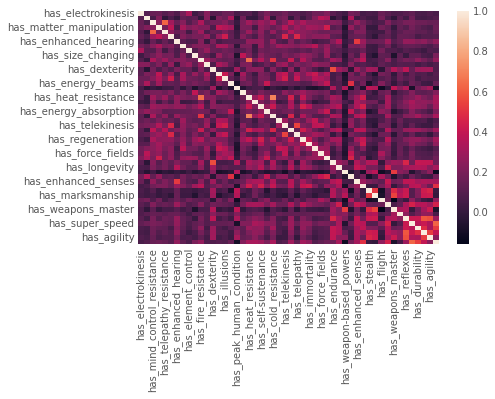

In [192]:

matriz_corr = data[colunas_poderes].corr()
sns.heatmap(matriz_corr)

In [179]:
#maiores correlações
c = matriz_corr.abs().unstack().sort_values().drop_duplicates().sort_values(kind='heapsort',ascending=False).head(50)
c

has_electrokinesis                has_electrokinesis                  1.000000
has_heat_resistance               has_cold_resistance                 0.697368
                                  has_fire_resistance                 0.648431
has_mind_control_resistance       has_telepathy_resistance            0.623824
has_super_speed                   has_super_strength                  0.621140
has_stamina                       has_reflexes                        0.590901
has_agility                       has_reflexes                        0.570554
has_endurance                     has_dexterity                       0.567263
has_weapons_master                has_marksmanship                    0.544670
has_telepathy                     has_telekinesis                     0.542841
has_super_strength                has_durability                      0.527254
has_stamina                       has_agility                         0.527169
has_weapons_master                has_weapon-based_p

Utilizando um pouco de NLP e a descrição do personagem como bag of words, qual são os heróis mais parecidos(pela semelhança/frequência entre palavras - similaridade por cosseno)


In [239]:
#Tratar descrição - remover stop words e lematizar

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
         if i.strip().lower() not in stop:
                word = lemmatizer.lemmatize(i.strip())
                final_text.append(word.lower())
                
    return  " ".join(final_text)
                
def gerar_semelhantes(heroi):
    data['descricao'] = data['history_text'].astype(str) + data['type_race'].astype(str) + data['powers_text'].fillna("").astype(str)
    data.descricao = data.descricao.apply(lemmatize_words) 
    data[['name','descricao']].head(10)

   
    tf=CountVectorizer()
    X=tf.fit_transform(data['descricao']).todense()

    cosine_sim = cosine_similarity(X)
    index_l = data[data['name'] == heroi].index.values[0]
    similar_herois = list(enumerate(cosine_sim[index_l]))
    sort_herois = sorted(similar_herois , key = lambda X:X[1] , reverse = True)
    sort_herois.pop(0)
    sort_herois = sort_herois[:10]

    top10 = []

    for herois in sort_herois:
        #print(data.name[movies[0]])
        top10.append(data.name[herois[0]])
    return top10, heroi

Quais são os 10 mais semelhantes/relacionados com o 'Goku','Batman 1996' e 'Aquaman'?

In [240]:
top10_1,heroi_1 = gerar_semelhantes('Goku')
top10_2,heroi_2 = gerar_semelhantes('Batman (1966)')
top10_3,heroi_3 = gerar_semelhantes('Aquaman')
df_compilada = pd.DataFrame(top10_1).rename(columns={0:heroi_1}).join(pd.DataFrame(top10_2).rename(columns={0:heroi_2})).join(pd.DataFrame(top10_3).rename(columns={0:heroi_3}))
df_compilada

c:\Users\johnn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\johnn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\Users\johnn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/re

,Goku,Batman (1966),Aquaman
0,Kefla,Batman II,Mera
1,Vegeta,Robin,Black Manta (DCEU)
2,Caulifla,Batman (Burtonverse),Aqualad
3,Kale,Batman (Arkham),Aquababy
4,Doomsday,Robin II,Aquaman (Injustice)
5,Savage Dragon,Joker,Ocean Master (DCEU)
6,Champion Of The Universe,Batgirl IV,Ocean Master
7,Supergirl,Alfred (DCEU),King Shark
8,Captain Planet,Batman (LEGO),Mera (New 52)
9,Johnny Quick,Red Death,Wonder Woman


Fez total sentido, principalmente os similares ao Aquaman a maioria são personagens também aquáticos